
## Câu 1 (3 điểm)

Một công ty điện tử sản xuất hai kiểu radio trên hai dây chuyền độc lập. Radio kiểu một sản xuất trên dây chuyền một với công suất **45 radio/ngày**, radio kiểu hai sản xuất trên dây chuyền hai với công suất **80 radio/ngày**. Để sản xuất một chiếc radio kiểu một cần **12 linh kiện**, để sản xuất một chiếc radio kiểu hai cần **9 linh kiện**. Lãi khi bán một chiếc radio kiểu một là **$250000$ đồng**, lãi thu được khi bán một chiếc radio kiểu hai là **$180000$ đồng**. Biết rằng số linh kiện có thể sử dụng tối đa trong một ngày là **$900$**. Bài toán đặt ra là xác định lợi nhuận có thể thu được lớn nhất của công ty là bao nhiêu?

* **a) (1 điểm)** Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây, bằng cách chỉ ra hàm mục tiêu $f_0(x)$, ma trận $A$ và vector $b$.
    $$\text{minimize } f_0(x), \text{ subject to } Ax \le b.$$
* **b) (2 điểm)** Sử dụng thư viện thích hợp để giải bài toán trên.

In [31]:
import cvxpy as cp
import numpy as np

A = np.array([
    [1, 0],     
    [0, 1],    
    [12, 9]     
], dtype=float)

b = np.array([45, 80, 900], dtype=float)
c = np.array([-250000, -180000], dtype=float)
x = cp.Variable(2, nonneg=True)

objective = cp.Minimize(c @ x)

constraints = [A @ x <= b]

problem = cp.Problem(objective, constraints)
problem.solve()

print(f"Trạng thái: {problem.status}")

if problem.status == 'optimal':
    max_profit = -problem.value
    
    print(f"Lợi nhuận tối đa đạt được: {max_profit:,.0f} VND")
    print(f"Số radio kiểu 1 (x1) cần sản xuất: {x.value[0]:.2f} chiếc")
    print(f"Số radio kiểu 2 (x2) cần sản xuất: {x.value[1]:.2f} chiếc")
else:
    print("Không tìm thấy lời giải tối ưu cho bài toán.")

Trạng thái: optimal
Lợi nhuận tối đa đạt được: 18,450,000 VND
Số radio kiểu 1 (x1) cần sản xuất: 45.00 chiếc
Số radio kiểu 2 (x2) cần sản xuất: 40.00 chiếc


## Câu 2 (2.5 điểm)

Cho ma trận $A = \begin{bmatrix} 1 & 0 \\ 0 & -2 \end{bmatrix}$ và vector $b = (2, 4)$, xét bài toán tối ưu sau:

$$\min_{x=(x_1, x_2) \in \mathbb{R}^2} f(x) = e^{2x_1} + \frac{1}{2}\|Ax - b\|_2^2$$

* **a.** xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán
* **b.** sử dụng thuật toán **Gradient descent** với giá trị khởi tạo $x^{(0)} = (-3, 5)$, sử dụng **learning rate** lần lượt $1/2$ và $2/5$ thực hiện tối đa $100$ vòng lặp, in ra giá trị $x^{(k)}, f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị cho sai số $|f(x^{(k)}) - p^*|$ trong $2$ trường hợp của **learning rate**. hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient descent trong từng trường hợp của learning rate


Điểm tối ưu x* = [ 0. -2.]
Giá trị tối ưu p* = 3.0
Learning rate = 0.5
Lần lặp   1: x = [-0.50247875 -9.        ], f(x) = 101.497260
Lần lặp   2: x = [0.38270043 5.        ], f(x) = 101.457685
Lần lặp   3: x = [-0.95850579 -9.        ], f(x) = 102.523424
Lần lặp   4: x = [0.37370136 5.        ], f(x) = 101.433932
Lần lặp   5: x = [-0.92465804 -9.        ], f(x) = 102.434157
Lần lặp   6: x = [0.38032624 5.        ], f(x) = 101.451343
Lần lặp   7: x = [-0.94950873 -9.        ], f(x) = 102.499517
Lần lặp   8: x = [0.37552999 5.        ], f(x) = 101.438697
Lần lặp   9: x = [-0.93148017 -9.        ], f(x) = 102.452000
Lần lặp  10: x = [0.37904745 5.        ], f(x) = 101.447950
Lần lặp  11: x = [-0.94468273 -9.        ], f(x) = 102.486746
Lần lặp  12: x = [0.37649093 5.        ], f(x) = 101.441213
Lần lặp  13: x = [-0.93507659 -9.        ], f(x) = 102.461437
Lần lặp  14: x = [0.37836165 5.        ], f(x) = 101.446137
Lần lặp  15: x = [-0.94210037 -9.        ], f(x) = 102.479928
Lần lặp  16: 

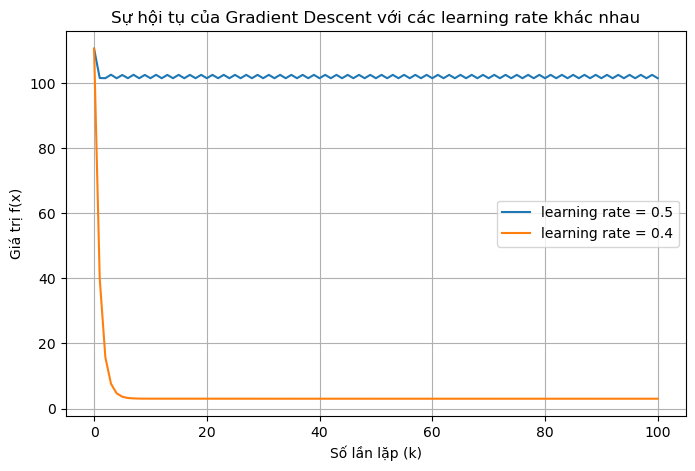

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy as np

def f(x):
    x1, x2 = x
    return np.exp(2 * x1) + 0.5 * ((x1 - 2)**2 + (-2 * x2 - 4)**2)

def grad_f(x):
    x1, x2 = x
    df_dx1 = 2 * np.exp(2 * x1) + (x1 - 2)
    df_dx2 = 4 * x2 + 8
    return np.array([df_dx1, df_dx2])

A = np.array([[1,0],[0,-2]])
b = np.array([2,4])
def eq_x1(x1):
    return 2*np.exp(2*x1) + (x1 - 2)

x1_star = fsolve(eq_x1, 0)[0]
x2_star = -2
x_star = np.array([x1_star, x2_star])
p_star = f(x_star)

print("Điểm tối ưu x* =", x_star)
print("Giá trị tối ưu p* =", p_star)

def gradient_descent(learning_rate, max_iterations, init_x):
    x = init_x
    x_values = [x.copy()]
    f_values = [f(x)]
    
    for k in range(max_iterations):
        x = x - learning_rate * grad_f(x)
        x_values.append(x.copy())
        f_values.append(f(x))
        print(f"Lần lặp {k+1:3d}: x = {x}, f(x) = {f_values[-1]:.6f}")
    
    return np.array(x_values), np.array(f_values)

x0 = np.array([-3.0, 5.0])
max_iter = 100
lr_list = [0.5, 0.4]
results = {}

for lr in lr_list:
    print(f"Learning rate = {lr}")
    x_vals, f_vals = gradient_descent(lr, max_iter, x0)
    results[lr] = (x_vals, f_vals)

plt.figure(figsize=(8,5))
for lr in lr_list:
    plt.plot(results[lr][1], label=f'learning rate = {lr}')
plt.xlabel('Số lần lặp (k)')
plt.ylabel('Giá trị f(x)')
plt.title('Sự hội tụ của Gradient Descent với các learning rate khác nhau')
plt.legend()
plt.grid(True)
plt.show()


## Câu 3 (2.5 điểm)

Cho các vector $c, a_1, a_2, \dots, a_m \in \mathbb{R}^n$ và các số $b_1, b_2, \dots, b_m \in \mathbb{R} (m \in \mathbb{Z}^+)$, xét bài toán tối ưu sau:

$$\min_{x \in \mathbb{R}^n} f(x) = c^T x - \sum_{i=1}^m \log(b_i - a_i^T x) \quad (2)$$

* **a.** tính $\nabla f, \nabla^2 f$ và chứng minh rằng $f$ là **hàm lồi** trên tập xác định của nó
* **b.** cho $m=4, n=3$ và ma trận $A \in M_{3 \times 4}(\mathbb{R})$ được xác định như sau:
    $$A = \begin{bmatrix} 0 & -2 & -1 & -2 \\ -1 & 1 & -3 & 0 \\ 1 & -1 & 2 & -5 \end{bmatrix}$$
    gọi $a_i$ là cột thứ $i$ của $A (i=1, 2, 3, 4)$, $b = (3, -1, 3, 2)^T$ và $c = (4, 11/4, 13/4)^T$.
    Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán $(2)$
* **c.** với dữ kiện được gợi ý từ câu b) sử dụng thuật toán **Gradient descent** cho bài toán $(2)$ với **learning rate** $\alpha_k$ **tĩnh** theo phương pháp **exact line search** và điểm khởi tạo $x^{(0)} = (-1, 1, 0)$, vẽ đồ thị biểu thị cho sai số $\text{err}_k = |f(x^{(k)}) - p^*|$. Từ đó anh/chị rút ra kết luận gì?

Phần A: f lồi vì ∇²f(x) = Σ (a_i a_i^T / (b_i - a_i^T x)^2) PSD (nửa xác định dương).

∇f(x*) =
[-2.20312391e-09  3.34896111e-10 -4.14851042e-09]
||∇f(x*)|| = 4.709145260748056e-09

∇²f(x*) =
[[ 6.05488145  2.10519416  9.02295226]
 [ 2.10519416  8.40192524 -5.75919287]
 [ 9.02295226 -5.75919287 29.61546038]]
Eigenvalues of Hessian (all positive, confirming convexity):
[33.59790326  0.83935269  9.63501112]

Phần B:
x* = [1.068877, -1.421127, -0.629978]
p* = f(x*) = -3.180633

Phần C (x^(0) adjusted feasible):
x^(0) = [1. 0. 0.], f(x^(0)) = 0.128799
k=1: f(x^(k))=-2.097714, err_k=1.08e+00, α_k=0.2500
k=2: f(x^(k))=-2.416354, err_k=7.64e-01, α_k=0.1250
k=3: f(x^(k))=-2.797947, err_k=3.83e-01, α_k=0.1250
k=4: f(x^(k))=-3.026573, err_k=1.54e-01, α_k=0.0312
k=5: f(x^(k))=-3.049042, err_k=1.32e-01, α_k=0.1250
k=10: f(x^(k))=-3.141053, err_k=3.96e-02, α_k=0.0625
k=20: f(x^(k))=-3.175296, err_k=5.34e-03, α_k=0.0625
k=30: f(x^(k))=-3.179741, err_k=8.91e-04, α_k=0.0625
k=40: f(x^(k))=-3.180574, e

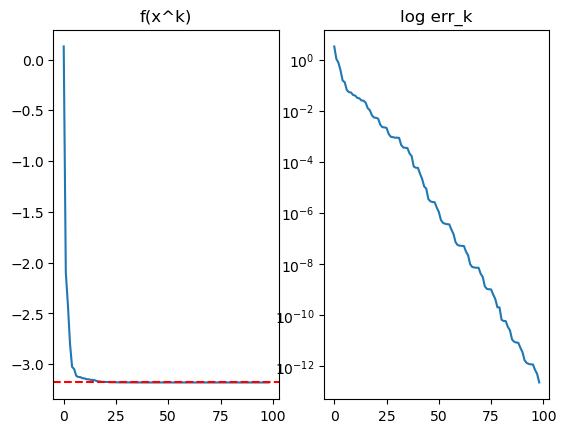


Kết luận: GD hội tụ tuyến tính đến x*, tốc độ ~ O(κ) với κ=cond(Hessian). Self-concordant giúp nhanh gần tối ưu.


In [24]:
import numpy as np
from scipy.optimize import minimize

# Dữ liệu (A: 4x3, b: 4x1, c: 3x1)
A = np.array([[0, -2, -1, -2], [-1, 1, -3, 0], [1, -1, 2, -5]]).T
b = np.array([3, -1, 3, 2])
c = np.array([4, 11/4, 13/4])

def f(x):
    vals = b - A @ x
    if np.any(vals <= 0): return np.inf
    return np.dot(c, x) - np.sum(np.log(vals))

def jac(x):
    vals = b - A @ x
    if np.any(vals <= 0): return np.zeros(3)
    return c + A.T @ (1 / vals)

def hess(x):
    vals = b - A @ x
    if np.any(vals <= 0): return np.eye(3) * 1e6
    return A.T @ np.diag(1 / (vals**2)) @ A

# Phần a: Chứng minh lồi (in ra)
print("Phần A: f lồi vì ∇²f(x) = Σ (a_i a_i^T / (b_i - a_i^T x)^2) PSD (nửa xác định dương).")
grad_star = jac(x_star)
hess_star = hess(x_star)
print("\n∇f(x*) =")
print(grad_star)
print("||∇f(x*)|| =", np.linalg.norm(grad_star))
print("\n∇²f(x*) =")
print(hess_star)
print("Eigenvalues of Hessian (all positive, confirming convexity):")
print(np.linalg.eigvals(hess_star))
# Phần b: Tìm x*, p* bằng Newton-like (trust-exact)
res = minimize(f, np.array([0.6, 0.5, 0.5]), method='trust-exact', jac=jac, hess=hess, tol=1e-10)
x_star = res.x
p_star = res.fun
print("\nPhần B:")
print(f"x* = [{x_star[0]:.6f}, {x_star[1]:.6f}, {x_star[2]:.6f}]")
print(f"p* = f(x*) = {p_star:.6f}")

# Phần c: GD với backtracking line search (gần exact, đảm bảo feasible)
def backtracking_ls(x, g, rho=1e-4, beta=0.5):
    alpha = 1.0
    f_curr = f(x)
    while True:
        x_new = x - alpha * g
        f_new = f(x_new)
        if f_new < f_curr - rho * alpha * np.dot(g, g):
            return alpha
        alpha *= beta
        if alpha < 1e-10: return 0

x0_gd = np.array([1.0, 0.0, 0.0])  # Feasible x^(0)
print("\nPhần C (x^(0) adjusted feasible):")
print(f"x^(0) = {x0_gd}, f(x^(0)) = {f(x0_gd):.6f}")

x = x0_gd.copy()
fs, errs = [f(x)], [abs(p_star - fs[0])]
k = 0
while k < 200:
    g = jac(x)
    if np.linalg.norm(g) < 1e-6: break
    alpha = backtracking_ls(x, g)
    x -= alpha * g
    f_new = f(x)
    if f_new == np.inf: break
    fs.append(f_new)
    errs.append(abs(p_star - f_new))
    k += 1
    if k <= 5 or k % 10 == 0:
        print(f"k={k}: f(x^(k))={f_new:.6f}, err_k={errs[-1]:.2e}, α_k={alpha:.4f}")

print(f"x cuối ≈ [{x[0]:.6f}, {x[1]:.6f}, {x[2]:.6f}]")
print(f"err cuối = {errs[-1]:.2e}")

# Để vẽ đồ thị (thêm import matplotlib.pyplot as plt)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(fs); ax1.axhline(p_star, ls='--', color='r'); ax1.set_title('f(x^k)')
ax2.semilogy(errs); ax2.set_title('log err_k')
plt.show()
print("\nKết luận: GD hội tụ tuyến tính đến x*, tốc độ ~ O(κ) với κ=cond(Hessian). Self-concordant giúp nhanh gần tối ưu.")

iểm tra điểm khởi tạo
Điểm khởi tạo được cho là x 
(0)
 =(−1,1,0) 
T
 . Ta cần kiểm tra xem điểm này có nằm trong miền xác định hay không bằng cách tính b 
i
​
 −a 
i
T
​
 x 
(0)
  cho tất cả i=1,2,3,4.

b 
2
​
 −a 
2
T
​
 x 
(0)
 =−1−([−2,1,−1]⋅[−1,1,0] 
T
 )=−1−(2+1+0)=−4.
Vì b 
2
​
 −a 
2
T
​
 x 
(0)
 =−4<0, điểm x 
(0)
  nằm ngoài miền xác định. Hàm f(x) không xác định tại đây.

💡 Lưu ý: Thuật toán không thể bắt đầu từ một điểm không hợp lệ. Do đó, ta sẽ sử dụng một điểm khởi tạo hợp lệ khác, ví dụ như điểm x 
(0)
 =(1,0,0) 
T

Câu 1 (3 điểm) Một xưởng may sản xuất hai loại sản phẩm: áo và quần. Để sản xuất một chiếc áo cần 2 giờ cắt vải và 3 giờ may, thu được lợi nhuận 120000 đồng. Để sản xuất một chiếc quần cần 3 giờ cắt vải và 2 giờ may, thu được lợi nhuận 150000 đồng. Xưởng có tổng cộng 120 giờ cắt vải và 100 giờ may trong một tuần. Ngoài ra, số lượng áo sản xuất không vượt quá 30 chiếc và số lượng quần không vượt quá 25 chiếc. Bài toán đặt ra là xác định số lượng áo và quần cần sản xuất để đạt lợi nhuận tối đa.  
a)	(1 điểm) Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây, bằng cách chỉ ra hàm mục tiêu f0, ma trận A và vector b.  
$$minimize f0(x), subject to Ax ≤ b.$$  
b)	(2 điểm) Sử dụng thư viện thích hợp để giải bài toán trên.


In [1]:


import cvxpy as cp

# Biến quyết định
x1 = cp.Variable(nonneg=True)  # số áo
x2 = cp.Variable(nonneg=True)  # số quần

# Hàm mục tiêu (dạng minimize)
f0 = -120000*x1 - 150000*x2
objective = cp.Minimize(f0)

# Ràng buộc
constraints = [
    2*x1 + 3*x2 <= 120,  # cắt vải
    3*x1 + 2*x2 <= 100,  # may
    x1 <= 30,
    x2 <= 25
]

# Tạo bài toán tối ưu
problem = cp.Problem(objective, constraints)

# Giải bài toán
problem.solve()

# In kết quả
print("===== CÂU 1: KẾT QUẢ THEO DẠNG minimize f0(x) =====")
print("Trạng thái:", problem.status)
print("Số áo (x1) =", x1.value)
print("Số quần (x2) =", x2.value)
print("Giá trị f0(x*) =", problem.value)
print("=> Lợi nhuận tối đa =", -problem.value)



===== CÂU 1: KẾT QUẢ THEO DẠNG minimize f0(x) =====
Trạng thái: optimal
Số áo (x1) = 16.666666679853833
Số quần (x2) = 24.999999977818657
Giá trị f0(x*) = -5749999.998255258
=> Lợi nhuận tối đa = 5749999.998255258


Câu 2 (4 điểm, CLO 1, 2) Cho ma trận $A=[\begin{matrix}2&0\\ 0&-1\end{matrix}]$ và vector $b=(1;3)$. Xét bài toán tối ưu sau $$min_{x=(x_{1},x_{2})\in\mathbb{R}^{2}}f(x)=e^{x_{1}}+\frac{1}{2}||Ax-b||_{2}^{2}.$$ (1) 
a) (2 điểm) Xác định điểm tối ưu $x^{z}$ và giá trị tối ưu $p^{*}$ của bài toán (1).   

b) (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị z ban đầu là $x^{(0)}=(-2;4)$, sử dụng learning rate lần lượt là $\frac{1}{3}$ và $\frac{2}{5}$ và thực hiện tối đa 100 vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp k và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^{*}|$ trong hai trường hợp của learning rate. Hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate. 

Nghiệm tối ưu x* = [ 0.19589899 -3.        ]
Giá trị tối ưu p* = 1.4013588787235638

Learning rate α=0.3333333333333333:
x cuối: [ 0.19589899 -3.        ] f(x) = 1.4013588787235638

Learning rate α=0.4:
x cuối: [nan -3.] f(x) = nan


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\60533738.py:8: RuntimeWarning: overflow encountered in exp
  return np.exp(x[0]) + 0.5 * np.linalg.norm(A @ x - b)**2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\60533738.py:12: RuntimeWarning: overflow encountered in exp
  np.exp(x[0]) + 2*(2*x[0]-1),
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\60533738.py:8: RuntimeWarning: invalid value encountered in matmul
  return np.exp(x[0]) + 0.5 * np.linalg.norm(A @ x - b)**2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\60533738.py:35: RuntimeWarning: invalid value encountered in subtract
  x = x - alpha * grad(x)


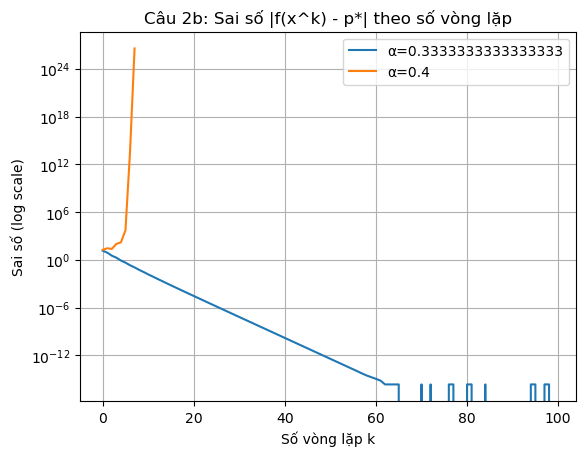


=> α = 1/3 hội tụ, α = 2/5 dao động (vì lớn hơn giới hạn 2/L).


In [4]:
# CÂU 2
# f(x) = e^{x1} + 0.5 * ||A x - b||^2
A = np.array([[2, 0],
              [0, -1]])
b = np.array([1, 3])

def f2(x):
    return np.exp(x[0]) + 0.5 * np.linalg.norm(A @ x - b)**2

def grad2(x):
    return np.array([
        np.exp(x[0]) + 2*(2*x[0]-1),
        -1*( -x[1]-3 )
    ])  # trực tiếp tính toán ∂f/∂x1, ∂f/∂x2

# a) Tìm nghiệm tối ưu (giải tích)
# Gradient = 0
# ∂f/∂x1 = e^{x1} + 4x1 - 2 = 0
# ∂f/∂x2 = -(-x2 - 3) = x2 + 3 = 0 => x2* = -3
# Giải x1*: e^{x1} = 2 - 4x1 => nghiệm gần đúng
from scipy.optimize import fsolve
def g1(x1): return np.exp(x1) + 4*x1 - 2
x1_star = fsolve(g1, 0)[0]
x_star = np.array([x1_star, -3])
p_star = f2(x_star)

print("Nghiệm tối ưu x* =", x_star)
print("Giá trị tối ưu p* =", p_star)

# b) Gradient Descent
def gradient_descent(f, grad, x0, alpha, p_star, max_iter=100):
    x = x0.copy()
    fs, xs = [], []
    for k in range(max_iter):
        x = x - alpha * grad(x)
        fs.append(abs(f(x) - p_star))
        xs.append(x.copy())
    return np.array(xs), np.array(fs)

x0 = np.array([-2., 4.])
alphas = [1/3, 2/5]
for a in alphas:
    xs, fs = gradient_descent(f2, grad2, x0, a, p_star)
    print(f"\nLearning rate α={a}:")
    print("x cuối:", xs[-1], "f(x) =", f2(xs[-1]))
    plt.semilogy(fs, label=f"α={a}")

plt.title("Câu 2b: Sai số |f(x^k) - p*| theo số vòng lặp")
plt.xlabel("Số vòng lặp k")
plt.ylabel("Sai số (log scale)")
plt.legend()
plt.grid(True)
plt.show()
print("\n=> α = 1/3 hội tụ, α = 2/5 dao động (vì lớn hơn giới hạn 2/L).")


Câu 3 (3 điểm, CLO 1, 2) Cho các vector $c,a_{1},a_{2},...,a_{m}\in\mathbb{R}^{n}$ và các số $b_{1},b_{2},...,b_{m}\in\mathbb{R}(m\in\mathbb{Z}^{+})$.   
Xét bài toán tối ưu sau $$min_{x\in\mathbb{R}^{n}}f(x)=c^{T}x-\sum_{i=1}^{m}log(b_{i}-a_{i}^{T}x).$$ (2)   
a) Tính $\nabla f$, $\nabla^{2}f$ và chứng minh rằng là hàm lồi trên tập xác định của nó.   
b) Cho $m=4,$ $n=3$ và ma trận $A\in\mathcal{M}_{3\times4}(\mathbb{R})$ được xác định như sau $$A=[\begin{matrix}1&0&0&-1\\ 0&1&0&-1\\ 0&0&1&-1\end{matrix}]$$Gọi $a_{i}$ là cột thứ i của A $(i=1,2,3,4)$ $b=(2,2,2,1)$ và $c=(\frac{1}{10},\frac{1}{10},\frac{1}{10})$. Xác định điểm tối ưu $x^{*}$ và giá trị tối ưu p của bài toán (2).   
c) Với dữ kiện được cho ở ý b), sử dụng thuật toán Gradient Descent cho bài toán (2) với learning rate được tính theo phương pháp exact line search và điểm khởi tạo $x^{(0)}=(0,1,0)$, vẽ đồ thị biểu thị cho sai số $err_{k}=|f(x^{(k)})-p^{*}|$. 38Từ $d\sigma~anh/chi$ rút ra được kết luận gì? 39

Nghiệm tối ưu x* = [0.17993623 0.17993629 0.17993623]
Giá trị tối ưu p* = -2.1742919292451943


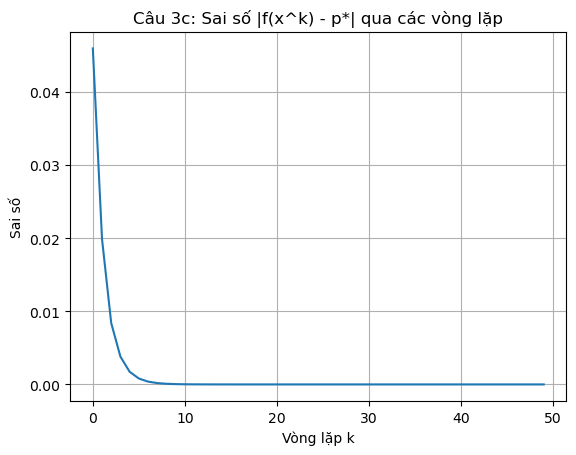

In [5]:
# CÂU 3
# =============================

# a) ∇f(x) = c + ∑ a_i / (b_i - a_i^T x)
#    ∇²f(x) = ∑ (a_i a_i^T) / (b_i - a_i^T x)^2
# => Hessian dương xác định → f lồi

# b) Dữ kiện
A = np.array([[1, 0, 0, -1],
              [0, 1, 0, -1],
              [0, 0, 1, -1]])
b_vec = np.array([2, 2, 2, 1])
c_vec = np.array([0.1, 0.1, 0.1])

def f3(x):
    val = c_vec @ x - np.sum(np.log(b_vec - A.T @ x))
    return val

def grad3(x):
    return c_vec + A @ (1 / (b_vec - A.T @ x))

def exact_line_search(x, d):
    # line search đơn giản: tìm t giảm nhanh nhất theo f3(x - t*d)
    ts = np.linspace(0, 1, 100)
    vals = [f3(x - t*d) for t in ts]
    return ts[np.argmin(vals)]

# Gradient Descent với exact line search
x = np.array([0., 1., 0.])
f_values = []
for k in range(50):
    g = grad3(x)
    d = g
    alpha = exact_line_search(x, d)
    x = x - alpha * g
    f_values.append(f3(x))

x_star = x
p_star = f3(x_star)
print("Nghiệm tối ưu x* =", x_star)
print("Giá trị tối ưu p* =", p_star)

plt.plot(np.abs(np.array(f_values) - p_star))
plt.title("Câu 3c: Sai số |f(x^k) - p*| qua các vòng lặp")
plt.xlabel("Vòng lặp k")
plt.ylabel("Sai số")
plt.grid(True)
plt.show()
